<a href="https://colab.research.google.com/github/majorquev/DBDC_202304_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C6/Clase6_2_reglas_de_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 4: Reglas de asociación


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

Las reglas de asociación nos permiten identificar relaciones entre variables a través de grandes datasets. Es posible cuantificar que tan "fuerte" es la relación obtenida mediante diversas métricas de interés, entre las cuales se destacan el _lift_, _support_ y _confidence_ de una regla.

Para más detalles sobre la definición y algoritmo de generación de las reglas refiérase a la presentación de la clase 7 de este curso.




In [1]:
install.packages("arules")


The downloaded binary packages are in
	/var/folders/r2/y9m75_w11cdbjpb1tfp78p3r0000gp/T//RtmpVU3WyV/downloaded_packages


In [1]:
library(arules)
library(dplyr)
data(Groceries)
class(Groceries)

inspect(head(Groceries, 6))

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write



Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "transactions"
attr(,"package")
[1] "arules"

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


In [2]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [3]:
names(Groceries)

NULL

In [ ]:
?transactions

In [4]:
 # Numero de items por observación mediante comndo size
size(head(Groceries,6))

[1] 4 3 1 4 4 5

In [5]:
 #LIST convierte las trasacciones a una lista (con mayusculas)
lista <- LIST(head(Groceries,6))

In [6]:
lista
class(lista)
str(lista)

[[1]]
[1] "citrus fruit"        "semi-finished bread" "margarine"          
[4] "ready soups"        

[[2]]
[1] "tropical fruit" "yogurt"         "coffee"        

[[3]]
[1] "whole milk"

[[4]]
[1] "pip fruit"     "yogurt"        "cream cheese " "meat spreads" 

[[5]]
[1] "other vegetables"         "whole milk"              
[3] "condensed milk"           "long life bakery product"

[[6]]
[1] "whole milk"       "butter"           "yogurt"           "rice"            
[5] "abrasive cleaner"

[1] "list"

List of 6
 $ : chr [1:4] "citrus fruit" "semi-finished bread" "margarine" "ready soups"
 $ : chr [1:3] "tropical fruit" "yogurt" "coffee"
 $ : chr "whole milk"
 $ : chr [1:4] "pip fruit" "yogurt" "cream cheese " "meat spreads"
 $ : chr [1:4] "other vegetables" "whole milk" "condensed milk" "long life bakery product"
 $ : chr [1:5] "whole milk" "butter" "yogurt" "rice" ...


In [7]:
class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

In [8]:
theta = 0.02
frequentItems <- eclat(Groceries, 
                        parameter = list(supp = theta)
                       ) # se calcula el support para items frecuentes

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.02      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 196 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating sparse bit matrix ... [59 row(s), 9835 column(s)] done [0.00s].
writing  ... [122 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


In [9]:
inspect(frequentItems)

      items                                           support    count
[1]   {whole milk, frozen vegetables}                 0.02043721  201 
[2]   {beef, whole milk}                              0.02125064  209 
[3]   {whole milk, curd}                              0.02613116  257 
[4]   {pork, whole milk}                              0.02216573  218 
[5]   {pork, other vegetables}                        0.02165735  213 
[6]   {frankfurter, whole milk}                       0.02053889  202 
[7]   {whole milk, bottled beer}                      0.02043721  201 
[8]   {whole milk, brown bread}                       0.02521607  248 
[9]   {whole milk, margarine}                         0.02419929  238 
[10]  {whole milk, butter}                            0.02755465  271 
[11]  {other vegetables, butter}                      0.02003050  197 
[12]  {whole milk, newspapers}                        0.02735130  269 
[13]  {whole milk, domestic eggs}                     0.02999492  295 
[14]  

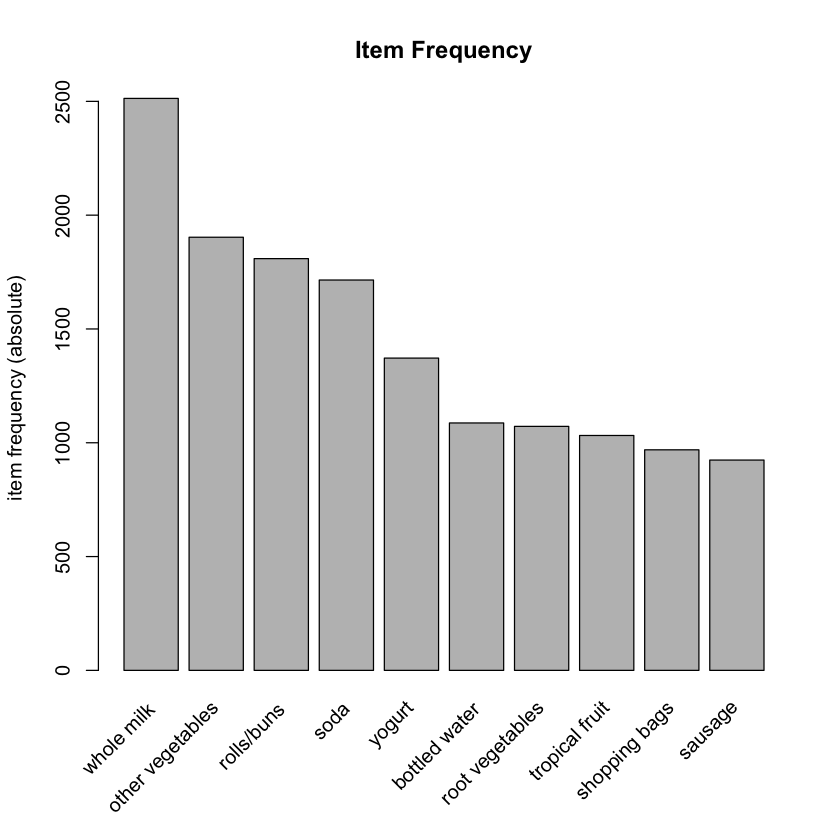

In [12]:
itemFrequencyPlot( # podemos graficar los items frecuentes
    Groceries,
    topN=10, 
    type="absolute", 
    main="Item Frequency"
)

## ¿Cómo determinamos las reglas?

In [13]:
rules <- apriori(data = Groceries, #debe ser del tipo "transactions"
                 parameter = list(supp=0.01, conf = 0.08),
                )
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.08    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 472 rules 

In [14]:
length(rules)
inspect(rules)

[1] 472

      lhs                           rhs                        support confidence   coverage      lift count
[1]   {}                         => {bottled beer}          0.08052872 0.08052872 1.00000000 1.0000000   792
[2]   {}                         => {pastry}                0.08896797 0.08896797 1.00000000 1.0000000   875
[3]   {}                         => {citrus fruit}          0.08276563 0.08276563 1.00000000 1.0000000   814
[4]   {}                         => {shopping bags}         0.09852567 0.09852567 1.00000000 1.0000000   969
[5]   {}                         => {sausage}               0.09395018 0.09395018 1.00000000 1.0000000   924
[6]   {}                         => {bottled water}         0.11052364 0.11052364 1.00000000 1.0000000  1087
[7]   {}                         => {tropical fruit}        0.10493137 0.10493137 1.00000000 1.0000000  1032
[8]   {}                         => {root vegetables}       0.10899847 0.10899847 1.00000000 1.0000000  1072
[9]   {}           

In [19]:
## Y si queremos buscar con qué combinar un producto determinado, por ejemplo leche
rules <- apriori(
    data = Groceries, 
    parameter =list (supp=0.03,conf = 0.10, minlen = 2),
    #appearance = list(default="rhs", lhs ="whole milk"),
    control = list (verbose=F)
) 

class(rules)
rules

[1] "rules"
attr(,"package")
[1] "arules"

set of 38 rules 

In [20]:
inspect(rules)

     lhs                     rhs                  support    confidence
[1]  {whipped/sour cream} => {whole milk}         0.03223183 0.4496454 
[2]  {whole milk}         => {whipped/sour cream} 0.03223183 0.1261441 
[3]  {pip fruit}          => {whole milk}         0.03009659 0.3978495 
[4]  {whole milk}         => {pip fruit}          0.03009659 0.1177875 
[5]  {pastry}             => {whole milk}         0.03324860 0.3737143 
[6]  {whole milk}         => {pastry}             0.03324860 0.1301234 
[7]  {citrus fruit}       => {whole milk}         0.03050330 0.3685504 
[8]  {whole milk}         => {citrus fruit}       0.03050330 0.1193792 
[9]  {sausage}            => {rolls/buns}         0.03060498 0.3257576 
[10] {rolls/buns}         => {sausage}            0.03060498 0.1663903 
[11] {bottled water}      => {whole milk}         0.03436706 0.3109476 
[12] {whole milk}         => {bottled water}      0.03436706 0.1345006 
[13] {tropical fruit}     => {other vegetables}   0.03589222 0.3

In [21]:
rules_conf <- sort( # ordenando por confidence rules.
    rules, 
    by="lift",
    decreasing = TRUE
)

In [22]:
rules
inspect(rules_conf)

set of 38 rules 

     lhs                     rhs                  support    confidence
[1]  {root vegetables}    => {other vegetables}   0.04738180 0.4347015 
[2]  {other vegetables}   => {root vegetables}    0.04738180 0.2448765 
[3]  {sausage}            => {rolls/buns}         0.03060498 0.3257576 
[4]  {rolls/buns}         => {sausage}            0.03060498 0.1663903 
[5]  {tropical fruit}     => {other vegetables}   0.03589222 0.3420543 
[6]  {other vegetables}   => {tropical fruit}     0.03589222 0.1854966 
[7]  {whipped/sour cream} => {whole milk}         0.03223183 0.4496454 
[8]  {whole milk}         => {whipped/sour cream} 0.03223183 0.1261441 
[9]  {whole milk}         => {root vegetables}    0.04890696 0.1914047 
[10] {root vegetables}    => {whole milk}         0.04890696 0.4486940 
[11] {yogurt}             => {other vegetables}   0.04341637 0.3112245 
[12] {other vegetables}   => {yogurt}             0.04341637 0.2243826 
[13] {tropical fruit}     => {whole milk}         0.04229792 0.4

## Transformación a objetos de clase transaction





In [ ]:
 ?transactions